Roots: [-0.9301505690524942, 2.6901384529222914]


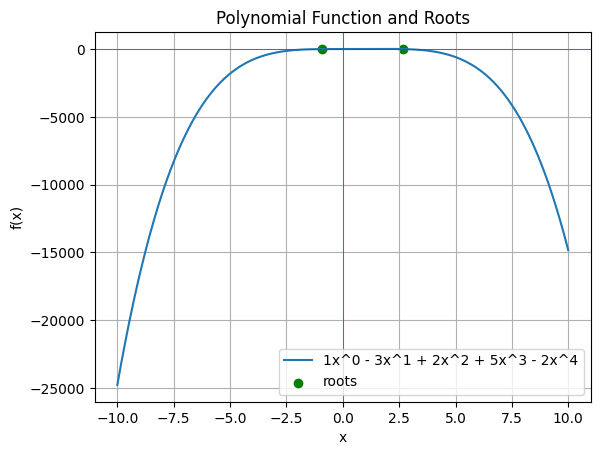

In [14]:
import numpy as np
from matplotlib import pyplot as plt

class Polynomial:

    def __init__(self, coeff):
        self.coeff = coeff
    
    def evaluate(self, x):
        # will return the value of the function for the given x
        result = 0 
        for i in range(len(self.coeff)):
            result += self.coeff[i] * x**i
        return result
    
    def derivative(self, x):
        result = 0
        for i in range(1, len(self.coeff)):
            result += i * self.coeff[i] * x**(i-1)
        return result
    
    def newton_raphson(self, initial, tolerance=1e-7, iter=1000):
        x = initial
        for i in range(iter):
            fx = self.evaluate(x)
            fdx = self.derivative(x)
            if abs(fdx) == 0:  
                break
            x_new = x - fx/fdx
            if abs(x_new - x) < tolerance:
                return x_new
            x = x_new
        return x
    
    def find_roots(self, initial, tolerance=1e-7):
        roots = []
        for val in initial:
            root = self.newton_raphson(val, tolerance)
            is_unique = True  
            for r in roots:
                if abs(root - r) < tolerance:  
                    is_unique = False  
                    break   
            if is_unique:
                roots.append(root)  
        return roots
    
    def poly_label(self):
        terms = []
        for i in range(len(self.coeff)):
            coef = self.coeff[i]
            if coef != 0:
                terms.append(f"{coef}x^{i}")
        return " + ".join(terms).replace(" + -", " - ")
    
    def plot(self, roots):
        x_val = np.linspace(-10, 10, 1000)
        y_val = [self.evaluate(x) for x in x_val]

        plt.plot(x_val, y_val, label=self.poly_label())
        plt.scatter(roots, [0]*len(roots), color='green', label='roots')

        plt.axhline(0, color='red', linewidth=0.5)
        plt.axvline(0, color='red', linewidth=0.5)
        plt.title('Polynomial Function and Roots')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

# main method

coefficients = [1, -3, 2, 5, -2]
polynomial = Polynomial(coefficients)
initial = np.linspace(-10, 10, 100)  
roots = polynomial.find_roots(initial)

print("Roots:", roots)

polynomial.plot(roots)
